# Naive Bayes classifier: Google Play Store reviews

## Notebook set-up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

## 1. Data preparation

### 1.1. Load data from URL

In [2]:
# Load the data from the URL provided in the project tutorial
data_df=pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv')

### 1.2. Inspect

In [3]:
data_df.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


### 1.3. Train-test split

In [4]:
# Split the data into training and testing features and labels
training_df, testing_df=train_test_split(
    data_df,
    test_size=0.3,
    random_state=315
)

### 1.4. Data encoding

In [5]:
# Get just the reviews from the training data
training_reviews=training_df['review']
testing_reviews=testing_df['review']

# Fit the vectorizer and transform the training reviews into word counts
vector_model=CountVectorizer(stop_words="english")
vector_model.fit(training_reviews)
training_word_counts=vector_model.transform(training_reviews).toarray()
testing_word_counts=vector_model.transform(testing_reviews).toarray()

print(f'Word count matrix has {training_word_counts.shape[0]} rows and {training_word_counts.shape[1]} columns')

Word count matrix has 623 rows and 3012 columns


In [6]:
# Get the words from the vector model
feature_names=vector_model.get_feature_names_out()

# Convert the word counts back into a dataframe
training_word_counts=pd.DataFrame(training_word_counts, columns=feature_names)
testing_word_counts=pd.DataFrame(testing_word_counts, columns=feature_names)

# Take a look...
training_word_counts.head()

,000,04,0x,10,100,101,11,1186,12,125,...,śŕ,şŕ,šŕ,šŕľ,źŕ,żŕ,żŕľ,žŕ,žŕľ,ˇŕ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2. EDA

### 2.1. Baseline model performance

In [7]:
training_df['polarity'].value_counts()

polarity
0    414
1    209
Name: count, dtype: int64

In [8]:
# Accuracy for constant '0' model
accuracy=((len(testing_df) - sum(testing_df['polarity'])) / len(testing_df))*100
print(f'Testing accuracy of constant "0" model: {accuracy:.1f}%')

Testing accuracy of constant "0" model: 63.4%


In [9]:
# Accuracy for simple logistic regression model
model=LogisticRegression()
model.fit(training_word_counts, training_df['polarity'])

accuracy=accuracy_score(
    model.predict(testing_word_counts),
    testing_df['polarity']
)

print(f'Testing accuracy of logistic regression model: {accuracy*100:.1f}%')

Testing accuracy of logistic regression model: 78.4%


### 2.2. Review length distribution

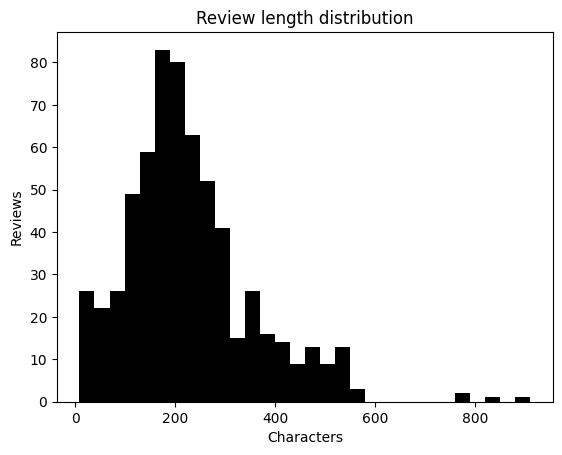

Review length mean: 227
Review length min: 8
Review length max: 910


In [10]:
lengths=training_df['review'].str.len().tolist()

plt.title('Review length distribution')
plt.xlabel('Characters')
plt.ylabel('Reviews')
plt.hist(lengths, bins=30, color='black')
plt.show()

print(f'Review length mean: {np.mean(lengths):.0f}')
print(f'Review length min: {min(lengths):.0f}')
print(f'Review length max: {max(lengths):.0f}')

#### 2.2.1. Long reviews

In [11]:
training_df['review_length']=lengths
long_reviews=training_df[training_df['review_length'] > 600]

print(long_reviews['review'].iloc[0])

  ătoo slow loading webclips!!! ăno pdf support at all... (even simpler apps do that!) ă web pages that are clipped do not adjust to current window size automatically when window is shrunk or expanded, (any program does this...geez). ă highlighting? needs more colors instead of brown mustard yellow. no customer support responses either, evernote must have been taken over by students. it's not even fun to use anymore because it is slow as hell.  this is especially for serious business users. any five star ratings down here must have been given by employees under different themes. this program has really retarded over the years. they need to stick to improving their bread and butter instead of selling side junk and features that are useless. well they got my money this time, so i have to put up with it for a few more months. the lack of pdf support really is terrible for a program like this.


In [12]:
print(long_reviews['review'].iloc[1])

  not since the update i don't.                                  update:- it is very slow on both data (uk ee network) and wifi (all of home via bt /work network/london underground virgin network) on all devices. version number is 13.0.2036.98649 on each device.  practically unusable at present and everything was fine before upgrading.  reading other comments i'm far from the only one having problems. high and low quality images helps but it is still worse than before the upgrade.  and just discovered that previously a double tap enlarged the text sufficiently to make it readable.  now it enlarges it a tiny amount but pinch and zoom is still required.    why did you do this?  the good old adage 'if it ain't broke don't fix it absolutely comes to mind.


In [13]:
print(long_reviews['review'].iloc[2])

 bait and switch i purchased my 3rd samsung tablet with  advertisement of free gifts, one of them being 48 additional gb cloud storage for 2 years.  the 2nd samsung tablet i bought also had this free gift and it was a nightmare to get samsung and dropbox to honor it.  so, after buying this 3rd high end tablet with the same claim of the free 48gb for 2 years in the fine print, which you can only see after purchasing the tablet, dropbox only honors the offer on the first device you purchased and you are disqualified for all future devices.  this is sleazy and bait and switch.  free= not subject to any compensation, encumbrance, repayment in kind, etc.  because of this bait and switch advertising on the part of samsung and dropbox i suggest you really find out what kind of company dropbox is before using their services.


#### 2.2.2. Short reviews

In [14]:
short_length=30

short_reviews=training_df[training_df['review_length'] < short_length]
short_reviews.head()

,package_name,review,polarity,review_length
755,com.shirantech.kantipur,too much pop up add,0,21
761,com.shirantech.kantipur,aa nice,1,8
851,com.hamropatro,very useful !,1,15
511,com.Slack,love new material design,1,26
840,com.hamropatro,usefully verry nice app,1,25


### 2.3. Feature selection

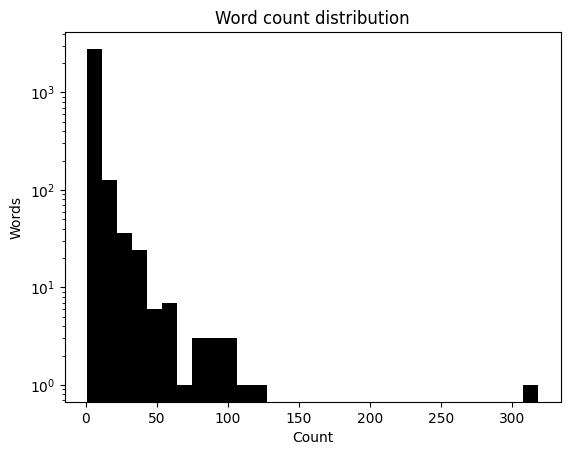

In [15]:
word_counts=training_word_counts.sum().tolist()

plt.title('Word count distribution')
plt.xlabel('Count')
plt.ylabel('Words')
plt.hist(word_counts, bins=30, color='black')
plt.yscale('log')
plt.show()

## 3. Model comparison

In [16]:
cross_val_scores={
    'Model': [],
    'Score': []
}

### 3.1. Multinomial Naive Bayes

In [17]:
scores=cross_val_score(
    MultinomialNB(),
    training_word_counts,
    training_df['polarity'],
    cv=7,
    n_jobs=-1
)

cross_val_scores['Model'].extend(['Multinomial Naive Bayes']*len(scores))
cross_val_scores['Score'].extend(scores*100)

print(f'Cross-validation accuracy: {np.mean(scores)*100:.1f} +/- {np.std(scores)*100:.1f}%')

Cross-validation accuracy: 81.5 +/- 4.9%


### 3.2. Gaussian Naive Bayes

In [18]:
scores=cross_val_score(
    GaussianNB(),
    training_word_counts,
    training_df['polarity'],
    cv=7,
    n_jobs=-1
)

cross_val_scores['Model'].extend(['Gaussian Naive Bayes']*len(scores))
cross_val_scores['Score'].extend(scores*100)

print(f'Cross-validation accuracy: {np.mean(scores)*100:.1f} +/- {np.std(scores)*100:.1f}%')

Cross-validation accuracy: 75.0 +/- 2.8%


### 3.3. Bernoulli Naive Bayes

In [19]:
scores=cross_val_score(
    BernoulliNB(),
    training_word_counts,
    training_df['polarity'],
    cv=7,
    n_jobs=-1
)

cross_val_scores['Model'].extend(['Bernoulli Naive Bayes']*len(scores))
cross_val_scores['Score'].extend(scores*100)

print(f'Cross-validation accuracy: {np.mean(scores)*100:.1f} +/- {np.std(scores)*100:.1f}%')

Cross-validation accuracy: 74.5 +/- 4.1%


### 3.4. Cross-validation performance

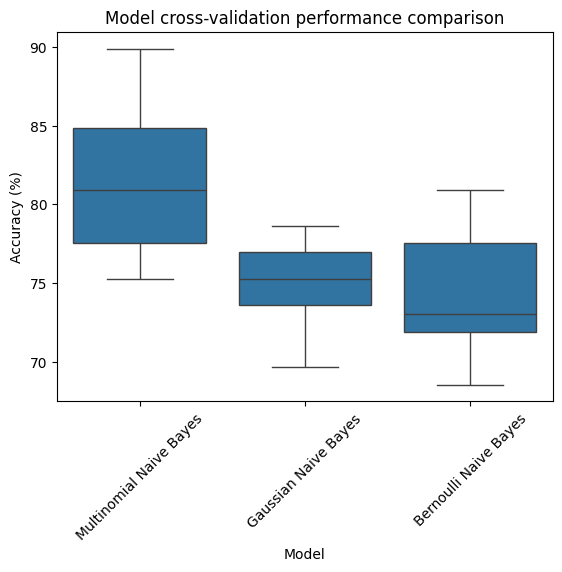

In [20]:
sns.boxplot(pd.DataFrame.from_dict(cross_val_scores), x='Model', y='Score')
plt.title('Model cross-validation performance comparison')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45)
plt.show()

## 4. Final model evaluation

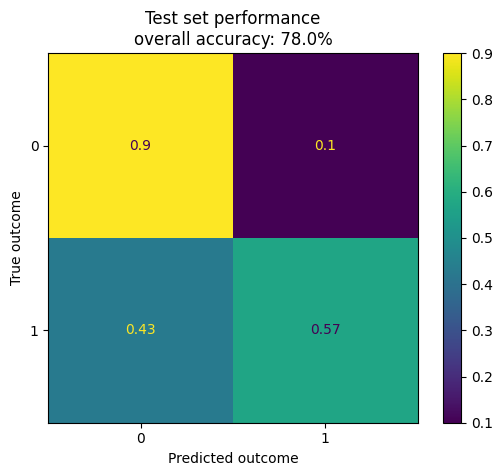

In [21]:
model=MultinomialNB()
model.fit(training_word_counts, training_df['polarity'])
testing_predictions=model.predict(testing_word_counts)
accuracy=accuracy_score(testing_predictions, testing_df['polarity'])*100

# Plot the confusion matrix
cm=confusion_matrix(testing_df['polarity'], testing_predictions, normalize='true')
cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm)
_=cm_disp.plot()

plt.title(f'Test set performance\noverall accuracy: {accuracy:.1f}%')
plt.xlabel('Predicted outcome')
plt.ylabel('True outcome')
plt.show()